In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trainRaw = pd.read_csv('newMembers.csv')

In [3]:
trainRaw.head()

,index,athlete_id,name,region,team,affiliate,gender,age,weight,height,converted,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,1.0,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,0.0,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Female,40.0,67.0,NaN,1.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,4,5286.0,Bryce Abbey,NaN,NaN,NaN,Female,32.0,65.0,149.0,1.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN


In [4]:
trainRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               216 non-null    int64  
 1   athlete_id          216 non-null    float64
 2   name                136 non-null    object 
 3   region              71 non-null     object 
 4   team                58 non-null     object 
 5   affiliate           69 non-null     object 
 6   gender              136 non-null    object 
 7   age                 136 non-null    float64
 8   weight              101 non-null    float64
 9   height              108 non-null    float64
 10  converted           108 non-null    float64
 11  eat                 68 non-null     object 
 12  train               73 non-null     object 
 13  background          72 non-null     object 
 14  experience          73 non-null     object 
 15  schedule            70 non-null     object 
 16  howlong 

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
train = trainRaw[['age','height','weight', 'gender','converted']]

In [6]:
train.head()

,age,height,weight,gender,converted
0,24.0,166.0,70.0,Male,1.0
1,42.0,190.0,70.0,Male,0.0
2,NaN,NaN,NaN,NaN,NaN
3,40.0,NaN,67.0,Female,1.0
4,32.0,149.0,65.0,Female,1.0


<AxesSubplot:>

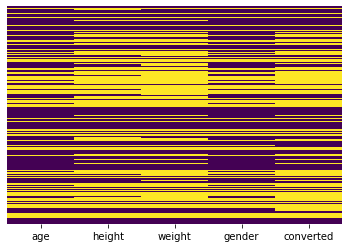

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Our Dataset has too many Null Values


In [8]:
train = train[train['converted'].isnull()==False]
train.head()

,age,height,weight,gender,converted
0,24.0,166.0,70.0,Male,1.0
1,42.0,190.0,70.0,Male,0.0
3,40.0,NaN,67.0,Female,1.0
4,32.0,149.0,65.0,Female,1.0
5,37.0,230.0,73.0,Male,1.0


<AxesSubplot:>

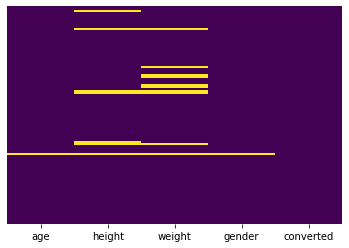

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
train['weight'] = train['weight'].fillna(train['weight'].mean())

In [11]:
train['height'] = train['height'].fillna(train['height'].mean())

<AxesSubplot:>

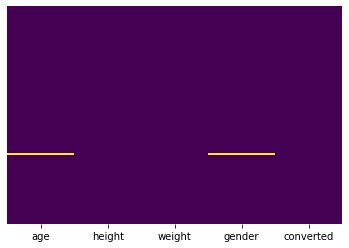

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

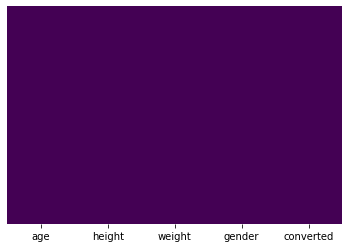

In [13]:
train = train.dropna()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 215
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        107 non-null    float64
 1   height     107 non-null    float64
 2   weight     107 non-null    float64
 3   gender     107 non-null    object 
 4   converted  107 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.0+ KB


# Our gender column is categorical data
Conterting it to dummy numerical data

In [15]:
train_gender = pd.get_dummies(train['gender'])


In [16]:
train = pd.concat([train, train_gender['Female']], axis=1)

train.drop('gender', axis=1, inplace = True)



In [17]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 215
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        107 non-null    float64
 1   height     107 non-null    float64
 2   weight     107 non-null    float64
 3   converted  107 non-null    float64
 4   Female     107 non-null    uint8  
dtypes: float64(4), uint8(1)
memory usage: 4.3 KB


In [18]:
train['converted'] = train['converted'].astype(int)
train['Female'] = train['Female'].astype(int)
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 215
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        107 non-null    float64
 1   height     107 non-null    float64
 2   weight     107 non-null    float64
 3   converted  107 non-null    int64  
 4   Female     107 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 5.0 KB


In [35]:
train.head()

,age,height,weight,converted,Female
0,24.0,166.000000,70.0,1,0
1,42.0,190.000000,70.0,0,0
3,40.0,185.118812,67.0,1,1
4,32.0,149.000000,65.0,1,1
5,37.0,230.000000,73.0,1,0


In [19]:
train.to_csv('newMemberTrans.csv')

# Our ETL is completed
Plotting graphs to establish relationship

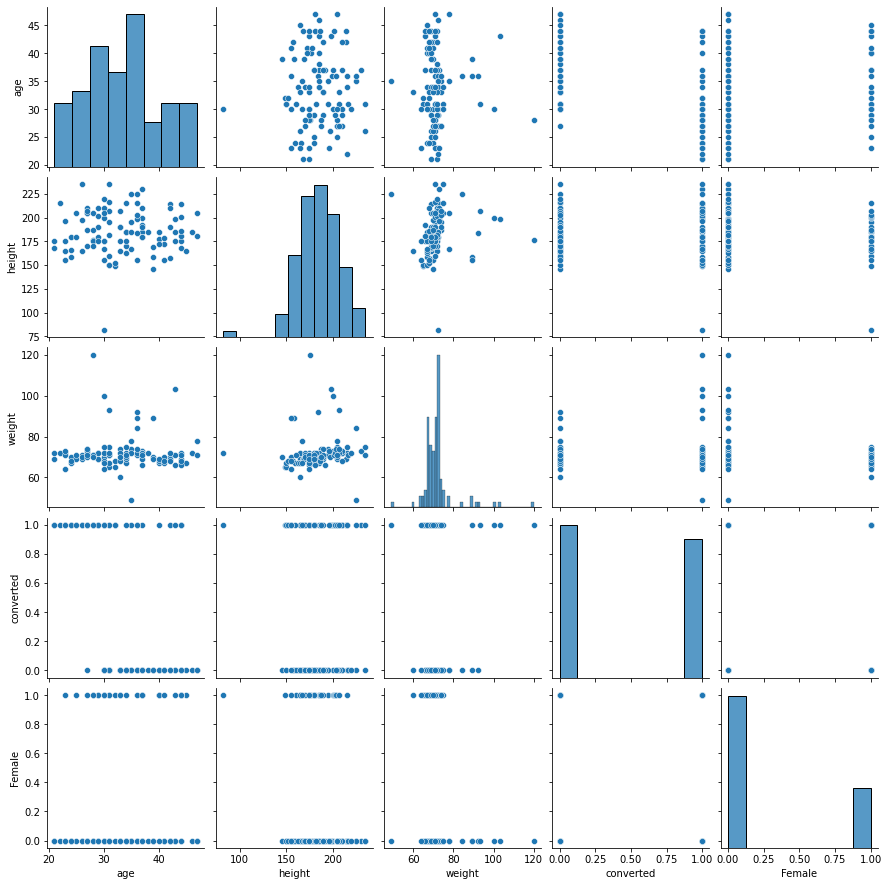

In [20]:
sns.pairplot(train)

<AxesSubplot:>

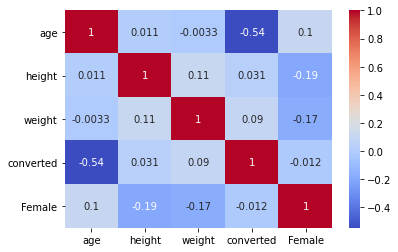

In [21]:
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

# Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('converted',axis=1), 
                                                    train['converted'], test_size=0.30, 
                                                    random_state=101)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.56      0.69      0.62        13

    accuracy                           0.67        33
   macro avg       0.66      0.67      0.66        33
weighted avg       0.69      0.67      0.67        33



In [43]:
#pred = logmodel.predict(np.array([[age,height(cms),weight(KG),Sex(M:0/F:1)]]))
#Hot Lead for moderate age and over weight
pred = logmodel.predict(np.array([[18,109,62,1]]))
pred[0]

1

In [36]:
#pred = logmodel.predict(np.array([[age,height(cms),weight(KG),Sex(M:0/F:1)]]))
#cold lead for overage and moderate weight
pred = logmodel.predict(np.array([[38,159,62,1]]))
pred[0]

0

# Storing Model in pickle file

In [30]:
import pickle

In [31]:
pickle.dump(logmodel, open('gymModel.pkl', 'wb'))

In [32]:
model = pickle.load((open('gymModel.pkl','rb')))

In [33]:
res = model.predict(np.array([[37,150,80,0]]))
res[0]

0